In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/paciente4/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

49607

In [6]:
with open('dataset/generado/paciente4/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

49607

In [8]:
with open('dataset/generado/paciente4/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

6201

In [10]:
with open('dataset/generado/paciente4/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

6201

In [12]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

6201

In [14]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

6201

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/vanilla_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 20s 12ms/step - loss: 0.0076 - mae: 0.0648 - mse: 0.0076 - val_loss: 0.0031 - val_mae: 0.0435 - val_mse: 0.0031
Epoch 2/50
1551/1551 [==============================] - 20s 13ms/step - loss: 0.0029 - mae: 0.0408 - mse: 0.0029 - val_loss: 0.0022 - val_mae: 0.0376 - val_mse: 0.0022
Epoch 3/50
1551/1551 [==============================] - 21s 14ms/step - loss: 0.0020 - mae: 0.0336 - mse: 0.0020 - val_loss: 0.0024 - val_mae: 0.0399 - val_mse: 0.0024
Epoch 4/50
1551/1551 [==============================] - 23s 15ms/step - loss: 0.0016 - mae: 0.0303 - mse: 0.0016 - val_loss: 0.0021 - val_mae: 0.0365 - val_mse: 0.0021
Epoch 5/50
1551/1551 [==============================] - 24s 15ms/step - loss: 0.0015 - mae: 0.0288 - mse: 0.0015 - val_loss: 0.0014 - val_mae: 0.0291 - val_mse: 0.0014
Epoch 6/50
1551/1551 [==============================] - 24s 15ms/step - loss: 0.0014 - mae: 0.0278 - mse: 0.0014 - val_loss: 0.0013 - val_mae: 0.0282 - val_mse:

194/194 [==============================] - 1s 7ms/step - loss: 0.0014 - mae: 0.0291 - mse: 0.0014
test loss, test acc: [0.0014465745771303773, 0.02912229858338833, 0.0014465745771303773]


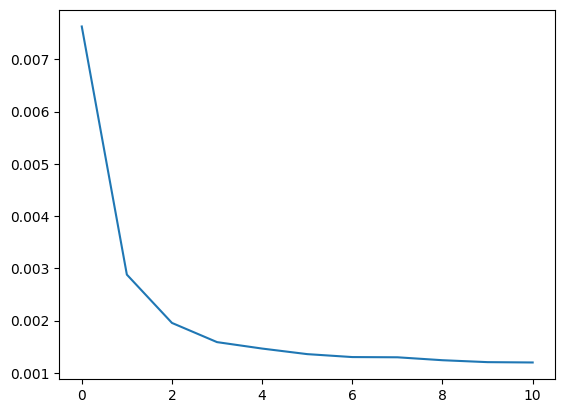

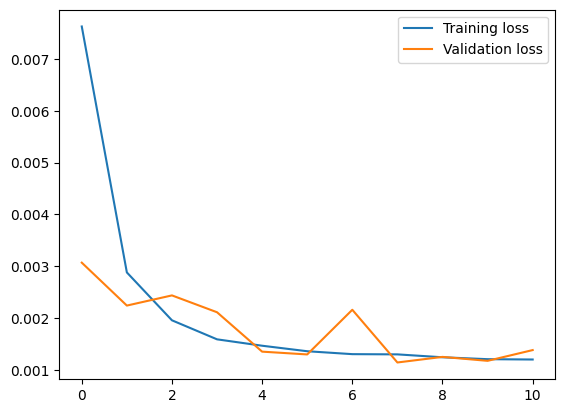

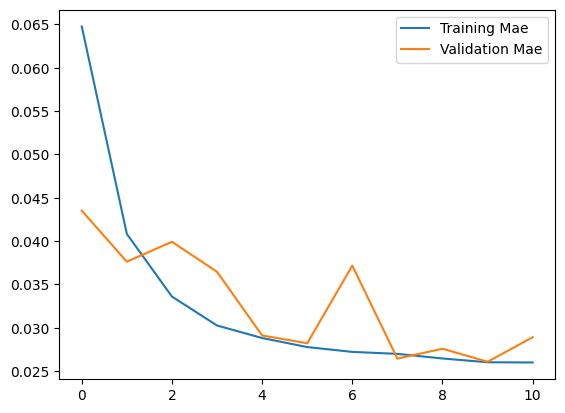

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 1s 6ms/step


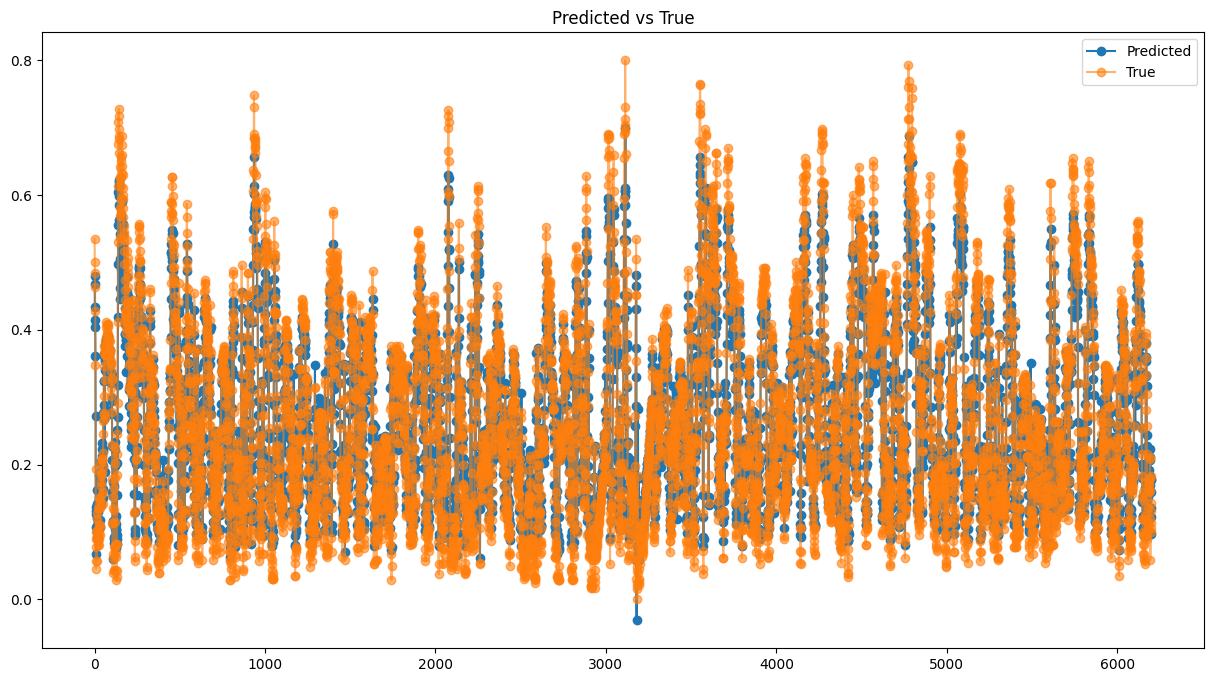

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.029122308187638876,
 'mse': 0.03803386070957643,
 'rmse': 0.0014465745604754613}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/vanilla_NO_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 26s 16ms/step - loss: 0.0035 - mae: 0.0415 - mse: 0.0035 - val_loss: 0.0013 - val_mae: 0.0275 - val_mse: 0.0013
Epoch 2/50
1551/1551 [==============================] - 24s 15ms/step - loss: 8.7434e-04 - mae: 0.0222 - mse: 8.7434e-04 - val_loss: 6.2232e-04 - val_mae: 0.0183 - val_mse: 6.2232e-04
Epoch 3/50
1551/1551 [==============================] - 23s 15ms/step - loss: 6.0768e-04 - mae: 0.0184 - mse: 6.0768e-04 - val_loss: 4.8330e-04 - val_mae: 0.0161 - val_mse: 4.8330e-04
Epoch 4/50
1551/1551 [==============================] - 24s 16ms/step - loss: 5.2707e-04 - mae: 0.0169 - mse: 5.2707e-04 - val_loss: 4.5334e-04 - val_mae: 0.0152 - val_mse: 4.5334e-04
Epoch 5/50
1551/1551 [==============================] - 23s 15ms/step - loss: 5.1607e-04 - mae: 0.0166 - mse: 5.1607e-04 - val_loss: 4.5230e-04 - val_mae: 0.0152 - val_mse: 4.5230e-04
Epoch 6/50
1551/1551 [==============================] - 24s 15ms/step - loss: 5.0704e-04 - mae: 

194/194 [==============================] - 1s 6ms/step - loss: 6.1303e-04 - mae: 0.0171 - mse: 6.1303e-04
test loss, test acc: [0.0006130277761258185, 0.01708032377064228, 0.0006130277761258185]


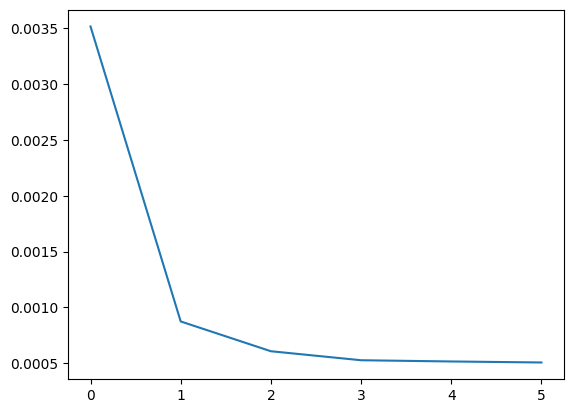

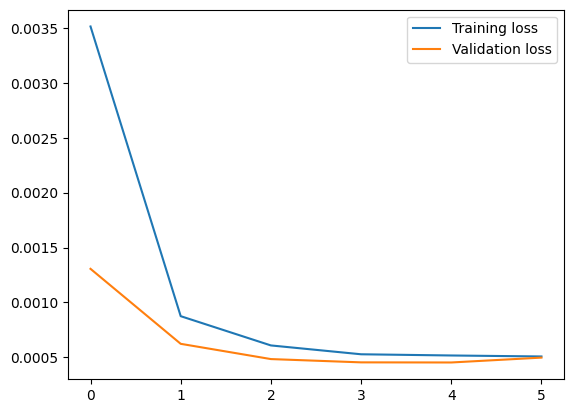

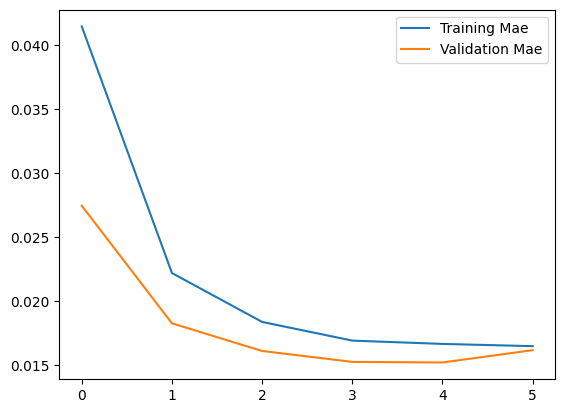

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 1s 6ms/step


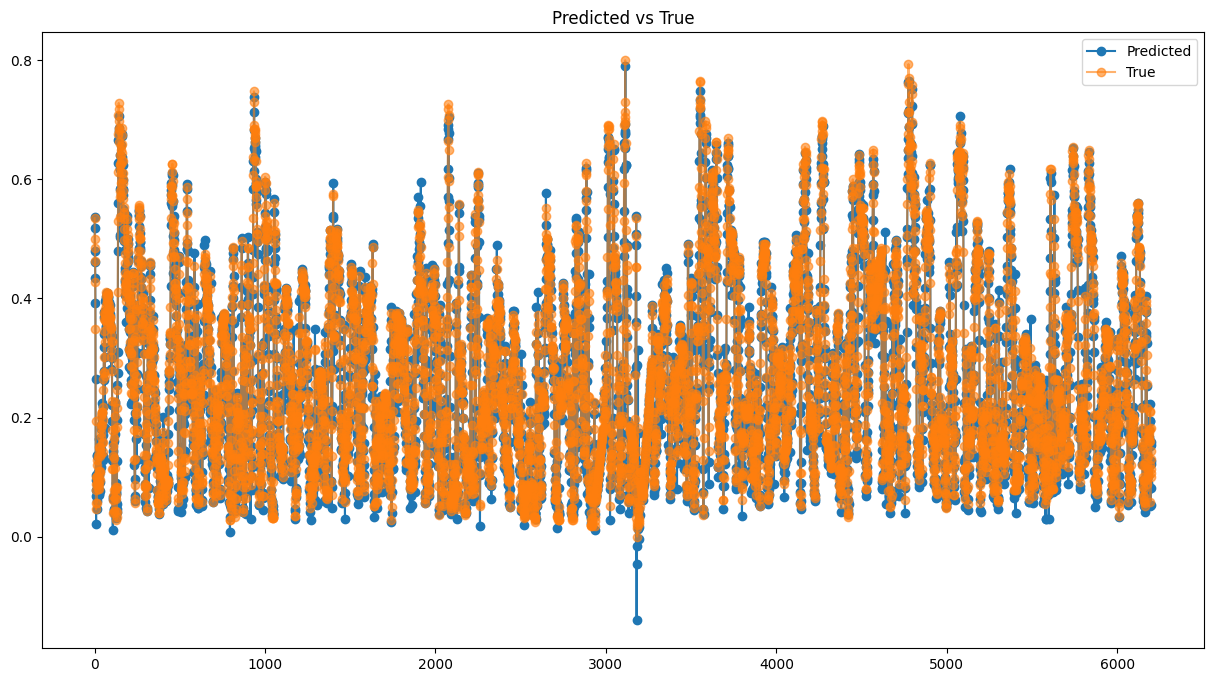

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.017080326639856924,
 'mse': 0.024759396009564207,
 'rmse': 0.0006130276907584239}

# Entrenamiento Stacked LSTM sin dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/stacked_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 50s 30ms/step - loss: 0.0077 - mae: 0.0658 - mse: 0.0077 - val_loss: 0.0035 - val_mae: 0.0476 - val_mse: 0.0035
Epoch 2/50
1551/1551 [==============================] - 45s 29ms/step - loss: 0.0025 - mae: 0.0382 - mse: 0.0025 - val_loss: 0.0018 - val_mae: 0.0336 - val_mse: 0.0018
Epoch 3/50
1551/1551 [==============================] - 45s 29ms/step - loss: 0.0018 - mae: 0.0321 - mse: 0.0018 - val_loss: 0.0031 - val_mae: 0.0457 - val_mse: 0.0031
Epoch 4/50
1551/1551 [==============================] - 46s 30ms/step - loss: 0.0016 - mae: 0.0300 - mse: 0.0016 - val_loss: 0.0015 - val_mae: 0.0280 - val_mse: 0.0015
Epoch 5/50
1551/1551 [==============================] - 47s 30ms/step - loss: 0.0014 - mae: 0.0281 - mse: 0.0014 - val_loss: 0.0019 - val_mae: 0.0340 - val_mse: 0.0019
Epoch 6/50
1551/1551 [==============================] - 48s 31ms/step - loss: 0.0014 - mae: 0.0284 - mse: 0.0014 - val_loss: 0.0025 - val_mae: 0.0391 - val_mse:

194/194 [==============================] - 2s 12ms/step - loss: 0.0018 - mae: 0.0315 - mse: 0.0018
test loss, test acc: [0.001781450235284865, 0.031491853296756744, 0.001781450235284865]


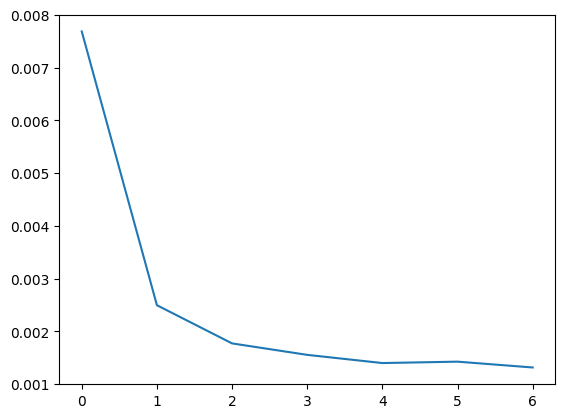

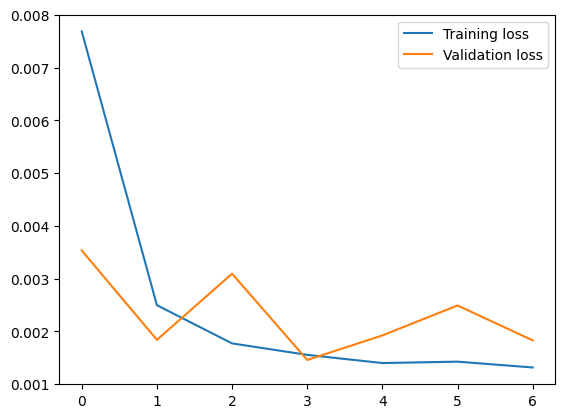

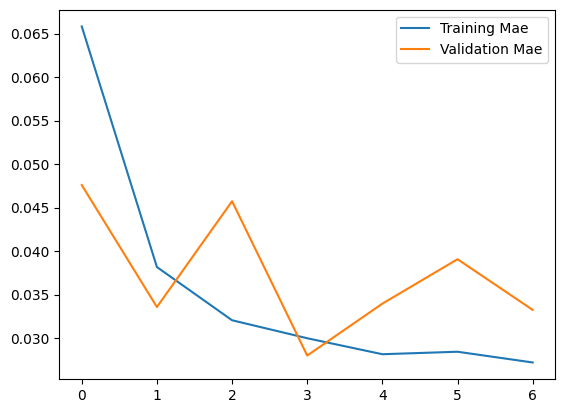

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 3s 11ms/step


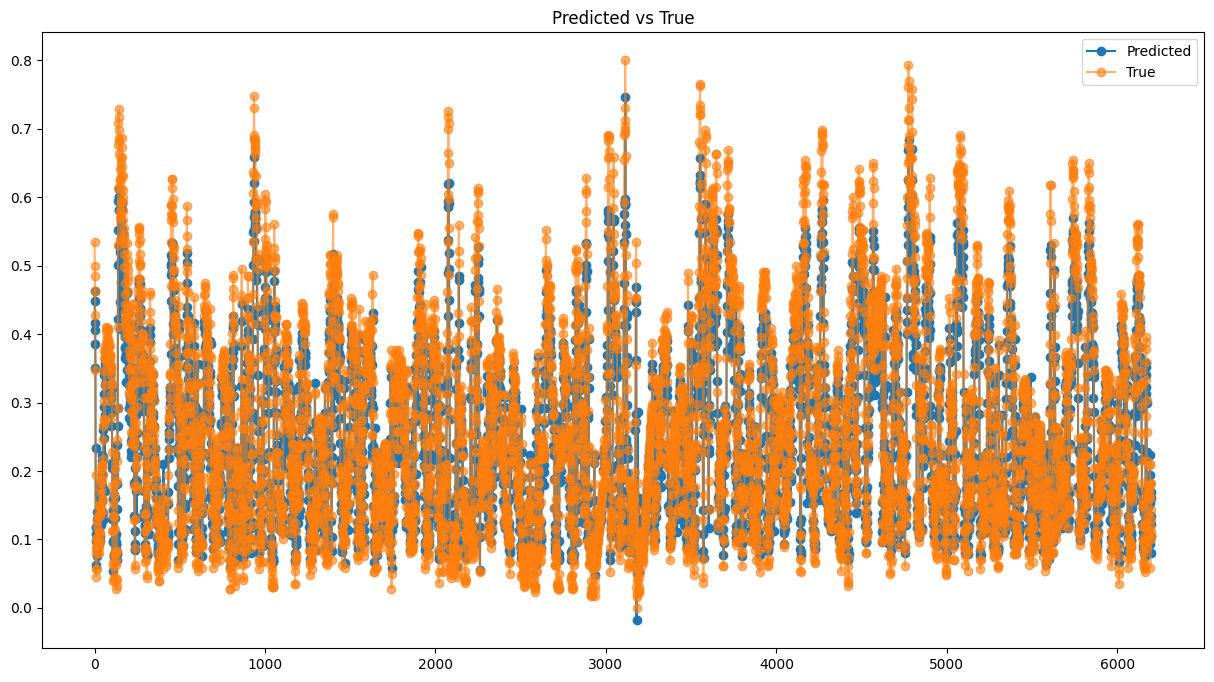

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03149184845348233,
 'mse': 0.042207234975186976,
 'rmse': 0.0017814506842506466}

# Entrenamiento Stacked LSTM con dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/stacked_NO_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 55s 32ms/step - loss: 0.0054 - mae: 0.0534 - mse: 0.0054 - val_loss: 0.0013 - val_mae: 0.0278 - val_mse: 0.0013
Epoch 2/50
1551/1551 [==============================] - 48s 31ms/step - loss: 7.8787e-04 - mae: 0.0211 - mse: 7.8787e-04 - val_loss: 4.7312e-04 - val_mae: 0.0159 - val_mse: 4.7312e-04
Epoch 3/50
1551/1551 [==============================] - 48s 31ms/step - loss: 5.5669e-04 - mae: 0.0175 - mse: 5.5669e-04 - val_loss: 4.6539e-04 - val_mae: 0.0157 - val_mse: 4.6539e-04
Epoch 4/50
1551/1551 [==============================] - 47s 30ms/step - loss: 5.2875e-04 - mae: 0.0169 - mse: 5.2875e-04 - val_loss: 5.8081e-04 - val_mae: 0.0182 - val_mse: 5.8081e-04
Epoch 5/50
1551/1551 [==============================] - 45s 29ms/step - loss: 5.0863e-04 - mae: 0.0165 - mse: 5.0863e-04 - val_loss: 5.4823e-04 - val_mae: 0.0174 - val_mse: 5.4823e-04


194/194 [==============================] - 2s 11ms/step - loss: 6.4128e-04 - mae: 0.0182 - mse: 6.4128e-04
test loss, test acc: [0.0006412760121747851, 0.018166011199355125, 0.0006412760121747851]


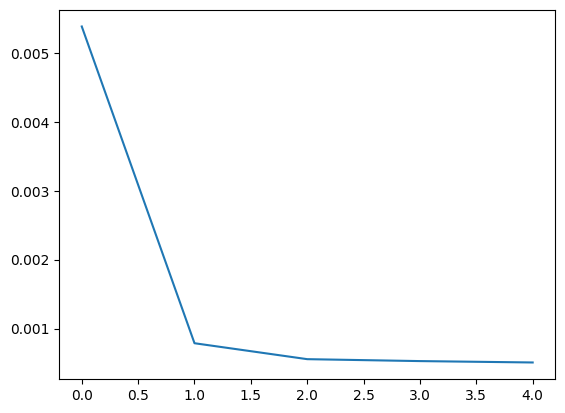

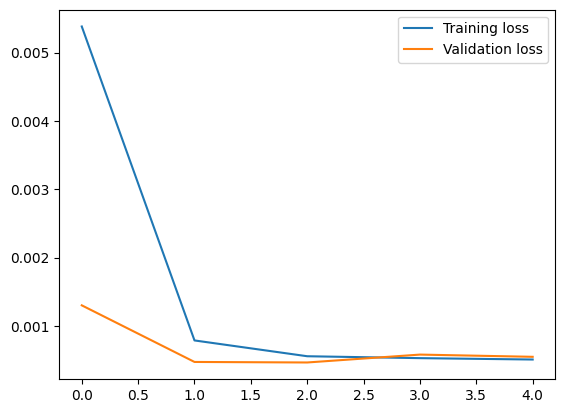

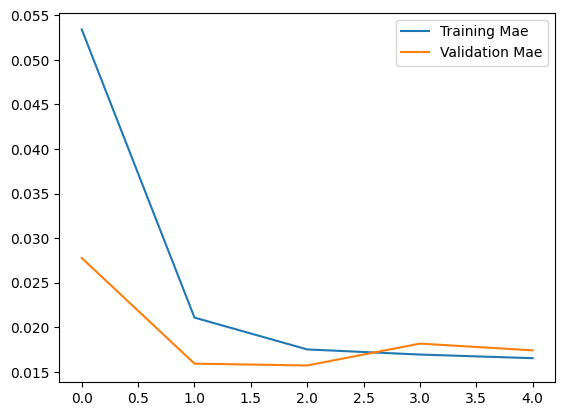

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 3s 10ms/step


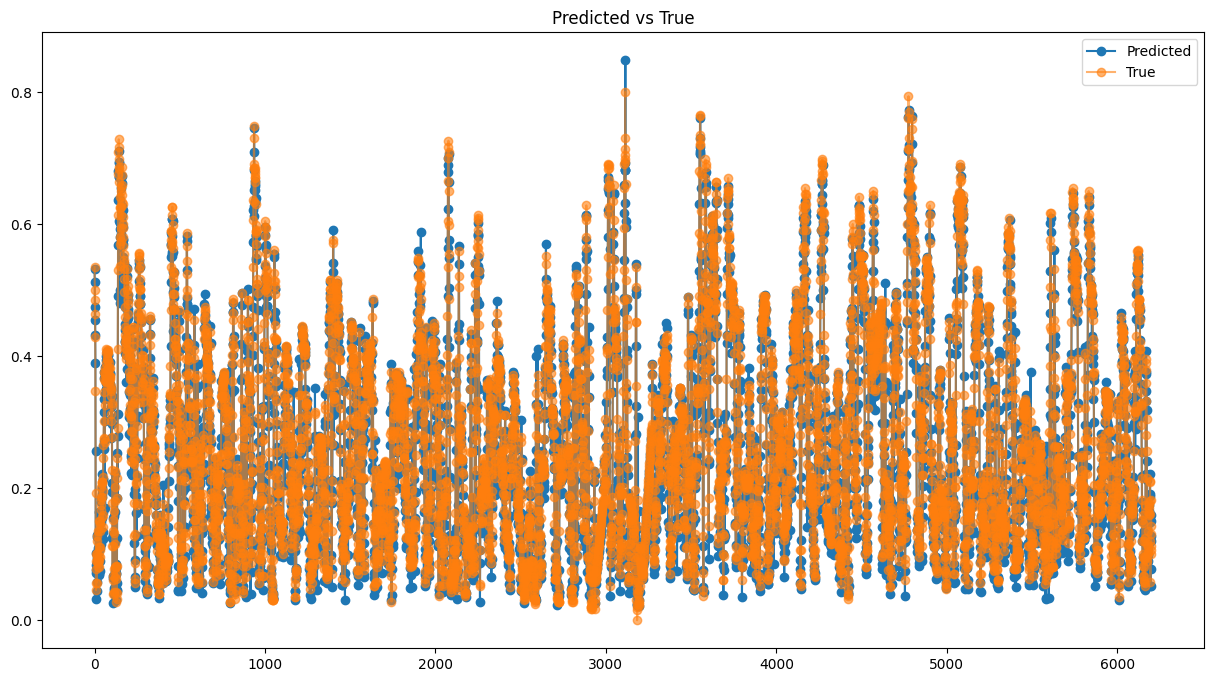

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.018166009956272385,
 'mse': 0.025323427170637246,
 'rmse': 0.0006412759636665687}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/bidirectional_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 32s 18ms/step - loss: 0.0080 - mae: 0.0665 - mse: 0.0080 - val_loss: 0.0023 - val_mae: 0.0362 - val_mse: 0.0023
Epoch 2/50
1551/1551 [==============================] - 27s 17ms/step - loss: 0.0028 - mae: 0.0402 - mse: 0.0028 - val_loss: 0.0020 - val_mae: 0.0357 - val_mse: 0.0020
Epoch 3/50
1551/1551 [==============================] - 28s 18ms/step - loss: 0.0019 - mae: 0.0333 - mse: 0.0019 - val_loss: 0.0011 - val_mae: 0.0250 - val_mse: 0.0011
Epoch 4/50
1551/1551 [==============================] - 28s 18ms/step - loss: 0.0015 - mae: 0.0299 - mse: 0.0015 - val_loss: 0.0010 - val_mae: 0.0254 - val_mse: 0.0010
Epoch 5/50
1551/1551 [==============================] - 29s 18ms/step - loss: 0.0014 - mae: 0.0283 - mse: 0.0014 - val_loss: 0.0011 - val_mae: 0.0256 - val_mse: 0.0011
Epoch 6/50
1551/1551 [==============================] - 28s 18ms/step - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - val_loss: 0.0012 - val_mae: 0.0273 - val_mse:

194/194 [==============================] - 1s 6ms/step - loss: 0.0012 - mae: 0.0270 - mse: 0.0012
test loss, test acc: [0.0012346269795671105, 0.026987407356500626, 0.0012346269795671105]


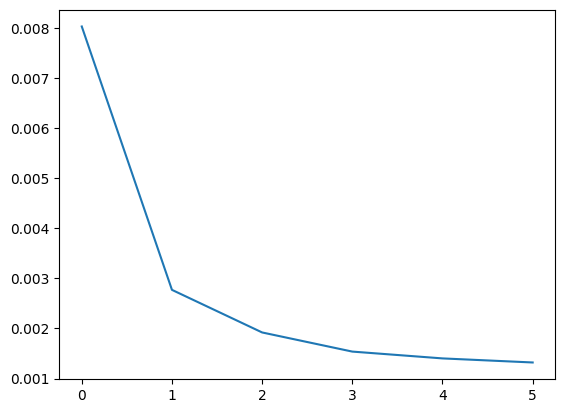

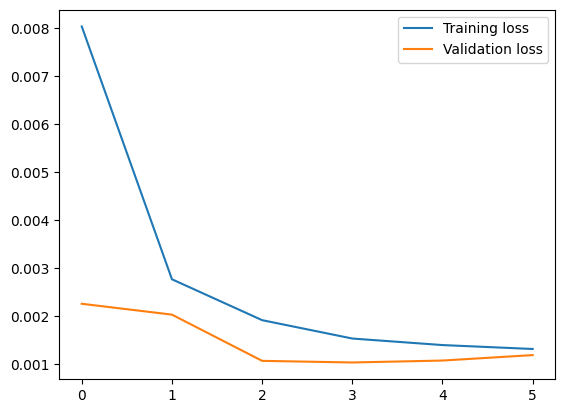

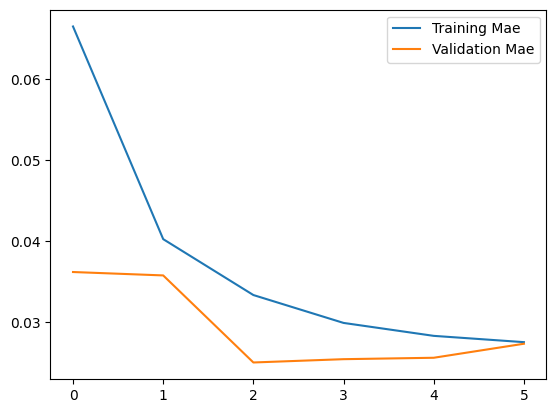

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 2s 6ms/step


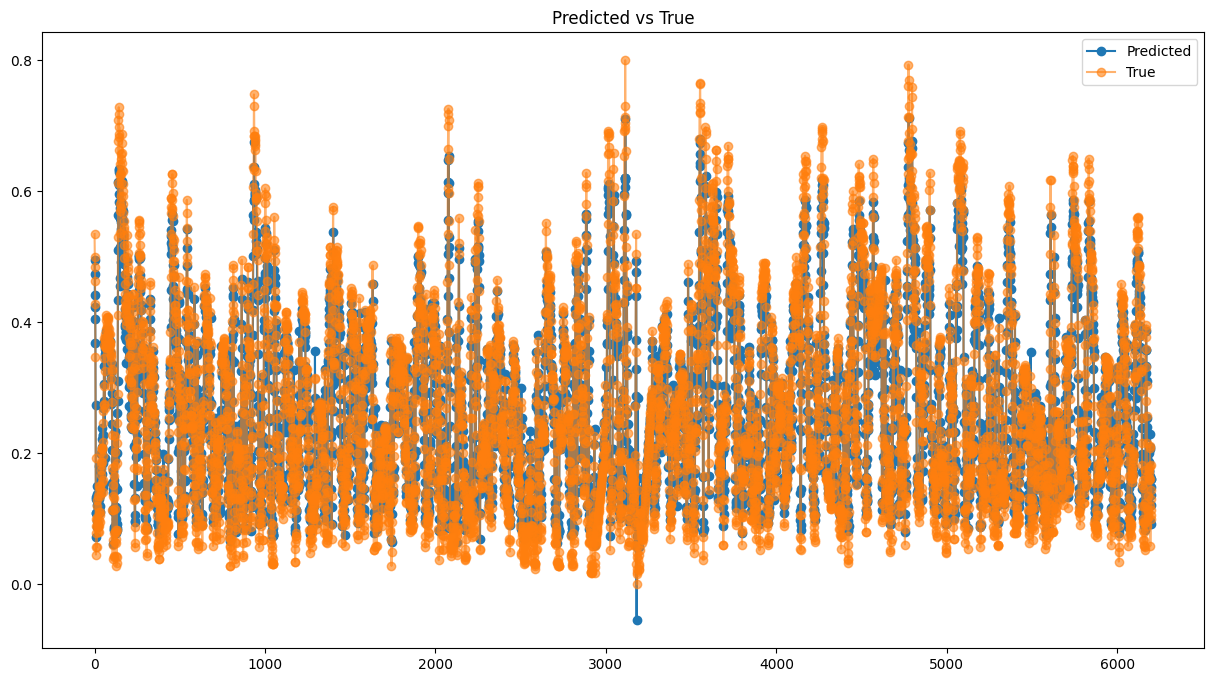

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.026987401851172158,
 'mse': 0.035137259510969764,
 'rmse': 0.0012346270059412352}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/bidirectional_NO_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 33s 19ms/step - loss: 0.0035 - mae: 0.0430 - mse: 0.0035 - val_loss: 0.0025 - val_mae: 0.0410 - val_mse: 0.0025
Epoch 2/50
1551/1551 [==============================] - 27s 18ms/step - loss: 8.9944e-04 - mae: 0.0226 - mse: 8.9944e-04 - val_loss: 5.9077e-04 - val_mae: 0.0179 - val_mse: 5.9077e-04
Epoch 3/50
1551/1551 [==============================] - 27s 17ms/step - loss: 5.9000e-04 - mae: 0.0181 - mse: 5.9000e-04 - val_loss: 5.0583e-04 - val_mae: 0.0165 - val_mse: 5.0583e-04
Epoch 4/50
1551/1551 [==============================] - 27s 18ms/step - loss: 5.2404e-04 - mae: 0.0169 - mse: 5.2404e-04 - val_loss: 5.7187e-04 - val_mae: 0.0179 - val_mse: 5.7187e-04
Epoch 5/50
1551/1551 [==============================] - 27s 18ms/step - loss: 5.0464e-04 - mae: 0.0165 - mse: 5.0464e-04 - val_loss: 6.8643e-04 - val_mae: 0.0204 - val_mse: 6.8643e-04
Epoch 6/50
1551/1551 [==============================] - 27s 18ms/step - loss: 4.9439e-04 - mae: 

194/194 [==============================] - 1s 7ms/step - loss: 8.1623e-04 - mae: 0.0220 - mse: 8.1623e-04
test loss, test acc: [0.0008162316516973078, 0.021963082253932953, 0.0008162316516973078]


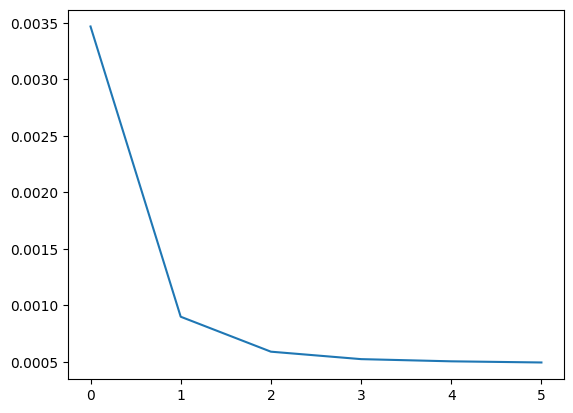

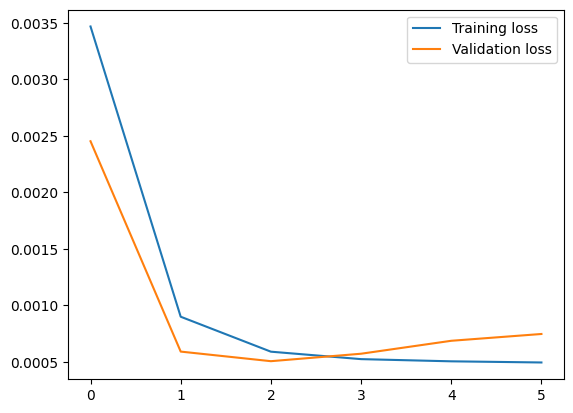

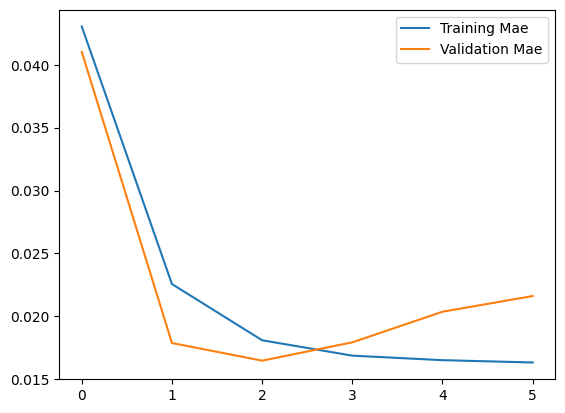

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 2s 6ms/step


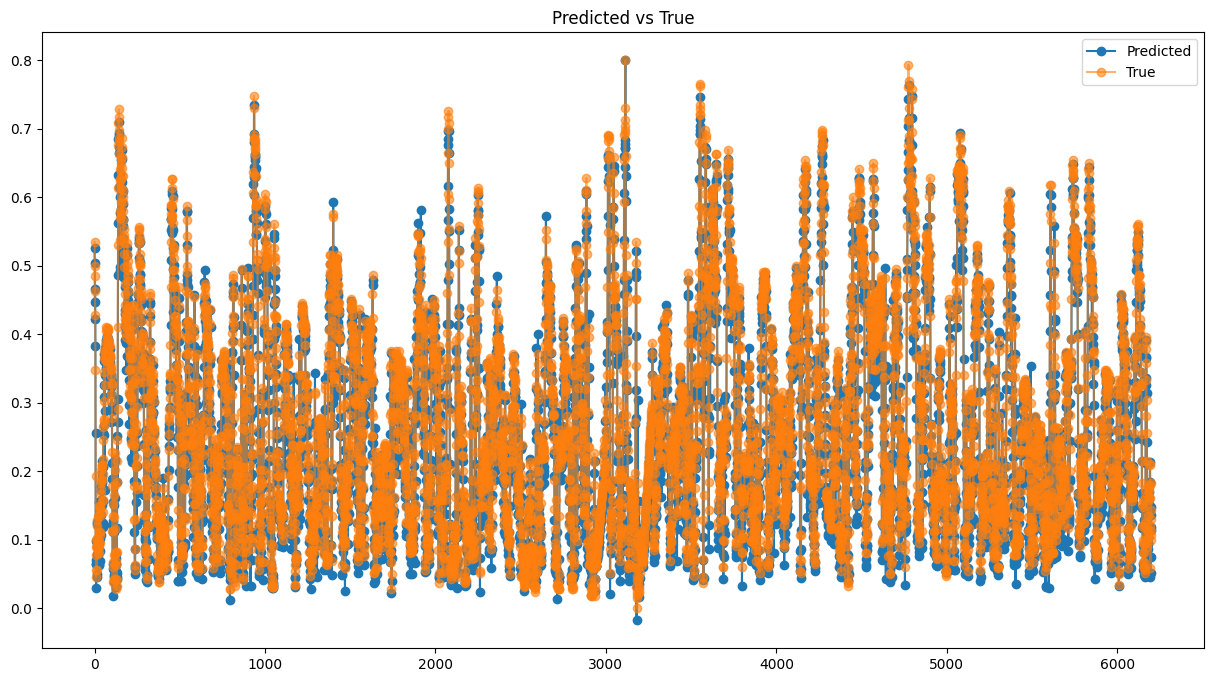

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.021963079025184937,
 'mse': 0.02856976473936998,
 'rmse': 0.0008162314572629482}